# A feladat - Túlélés a Titanicon

## Az adatok beimportálása

In [1]:
import pandas as pd

dataset = pd.read_csv('DA_titanic_train.csv')
dataset_pred = pd.read_csv('DA_titanic_test.csv')
final_test = dataset_pred.copy()

In [2]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
dataset_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
1,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


A megoldás során a két adattábla ugyanúgy kerül előkészítésre. A dependent variable csak a DA_titanic_train.csv-ben található meg, ezért az előkészítés után ez az adattábla kerül felbontásra (train/test) a legjobb modell megtalálásának érdekében.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  624 non-null    int64  
 1   Survived     624 non-null    int64  
 2   Pclass       624 non-null    int64  
 3   Name         624 non-null    object 
 4   Sex          624 non-null    object 
 5   Age          494 non-null    float64
 6   SibSp        624 non-null    int64  
 7   Parch        624 non-null    int64  
 8   Ticket       624 non-null    object 
 9   Fare         624 non-null    float64
 10  Cabin        128 non-null    object 
 11  Embarked     623 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB


In [5]:
dataset_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  267 non-null    int64  
 1   Pclass       267 non-null    int64  
 2   Name         267 non-null    object 
 3   Sex          267 non-null    object 
 4   Age          220 non-null    float64
 5   SibSp        267 non-null    int64  
 6   Parch        267 non-null    int64  
 7   Ticket       267 non-null    object 
 8   Fare         267 non-null    float64
 9   Cabin        76 non-null     object 
 10  Embarked     266 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 23.1+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,624.000000,624.000000,624.000000,494.000000,624.000000,624.000000,624.000000
mean,459.128205,0.383013,2.328526,29.658745,0.519231,0.354167,30.523470
std,257.314092,0.486511,0.822684,14.770773,1.071871,0.775559,48.186064
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,241.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,460.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.931250
75%,683.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset_pred.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,267.000000,267.000000,220.000000,267.000000,267.000000,267.000000
mean,415.318352,2.262172,29.789773,0.531835,0.445693,36.132224
std,255.301178,0.866346,13.995008,1.173773,0.871354,52.935439
min,4.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,174.500000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,412.000000,3.000000,29.000000,0.000000,0.000000,16.100000
75%,629.500000,3.000000,39.000000,1.000000,1.000000,36.125000
max,890.000000,3.000000,70.000000,8.000000,5.000000,512.329200


In [8]:
# Az elemzéshez fel nem használt értékek eltávolítása
dataset = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
dataset_pred = dataset_pred.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [9]:
# Az oszlopok rendezése a könnyebb átláthatóság érdekében
dataset = dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

In [10]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,3,male,35.0,0,0,8.0500,S,0
4,2,female,14.0,1,0,30.0708,C,1


In [11]:
dataset_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,female,35.0,1,0,53.1000,S
1,3,male,NaN,0,0,8.4583,Q
2,1,male,54.0,0,0,51.8625,S
3,3,male,2.0,3,1,21.0750,S
4,3,female,27.0,0,2,11.1333,S


## A hiányzó adatok kezelése

In [12]:
dataset.isnull().sum()

Pclass        0
Sex           0
Age         130
SibSp         0
Parch         0
Fare          0
Embarked      1
Survived      0
dtype: int64

In [13]:
dataset_pred.isnull().sum()

Pclass       0
Sex          0
Age         47
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64

In [14]:
from random import randint

age_mean = dataset['Age'].mean()
age_std = dataset['Age'].std()

for ds in (dataset, dataset_pred):
    for i in range(len(ds['Age'])):
        if type(ds['Age'][i]) != int:
            ds.iloc[i, 2] = randint(round(age_mean - age_std), round(age_mean + age_std))
    for i in range(len(ds['Embarked'])):
        if type(ds['Embarked'][i]) != str:
            ds.iloc[i, 6] = ds['Embarked'].mode()[0]
    print(ds.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## Az adattábláról

A dependent variable megléte miatt ez a rész a DA_titanic_train.csv alapján készült

In [15]:
dataset.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,2.328526,29.608974,0.519231,0.354167,30.523470,0.383013
std,0.822684,8.996574,1.071871,0.775559,48.186064,0.486511
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,30.000000,0.000000,0.000000,13.931250,0.000000
75%,3.000000,38.000000,1.000000,0.000000,30.000000,1.000000
max,3.000000,44.000000,8.000000,6.000000,512.329200,1.000000


In [16]:
# Új változó létrehozása az elemzéshez

isAlone = []

for i in range(len(dataset)):
    if dataset.iloc[i, 2] > 0 and dataset.iloc[i, 3] > 0:
        isAlone.append(0)
    else:
        isAlone.append(1)

,Pclass,Age,SibSp,Parch,Fare,Survived,IsAlone
Pclass,1.000000,0.003288,0.088388,0.018606,-0.535236,-0.375041,0.051772
Age,0.003288,1.000000,-0.032177,0.018270,-0.059708,0.029872,-0.016760
SibSp,0.088388,-0.032177,1.000000,0.434930,0.165351,-0.018764,-0.708491
Parch,0.018606,0.018270,0.434930,1.000000,0.209408,0.095096,-0.366164
Fare,-0.535236,-0.059708,0.165351,0.209408,1.000000,0.285250,-0.187943
Survived,-0.375041,0.029872,-0.018764,0.095096,0.285250,1.000000,-0.132843
IsAlone,0.051772,-0.016760,-0.708491,-0.366164,-0.187943,-0.132843,1.000000


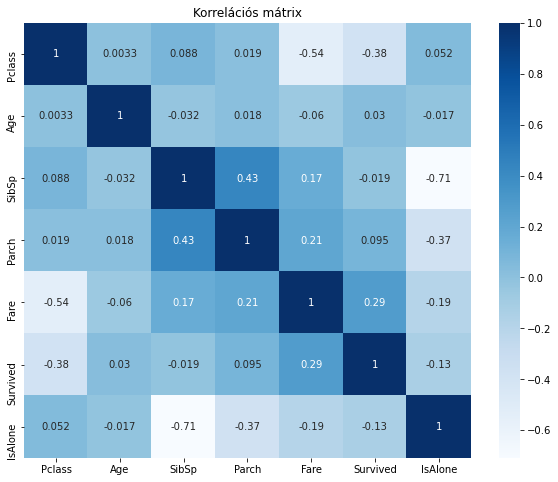

In [17]:
# Korrelációs mátrix

import matplotlib.pyplot as plt
import seaborn as sns

dataset['IsAlone'] = isAlone

corr_df = dataset.corr()
display(corr_df)
plt.figure(figsize = (10, 8))
plt.title('Korrelációs mátrix')
sns.heatmap(corr_df, annot = True, cmap = 'Blues')
plt.show()

dataset = dataset.drop(['IsAlone'], axis = 1)

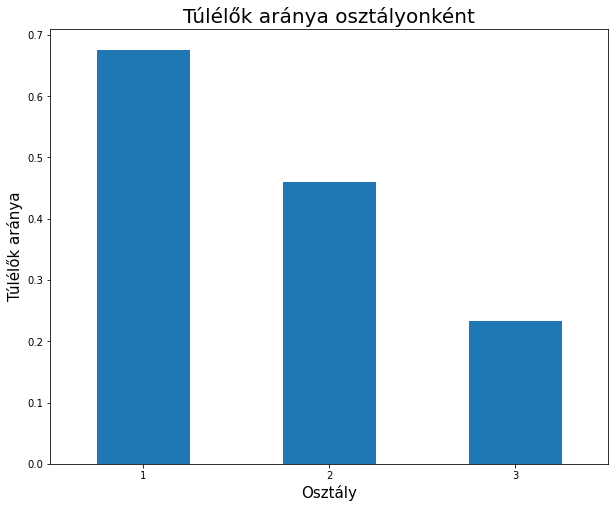

,Survived
Pclass,
1,0.676056
2,0.459259
3,0.233429


In [18]:
# Túlélők aránya osztályonként

dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot(kind = 'bar', figsize = (10, 8), legend = False)
plt.title('Túlélők aránya osztályonként', fontsize = 20)
plt.xlabel('Osztály', fontsize = 15)
plt.ylabel('Túlélők aránya', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

display(dataset[['Pclass', 'Survived']].groupby(['Pclass']).mean())

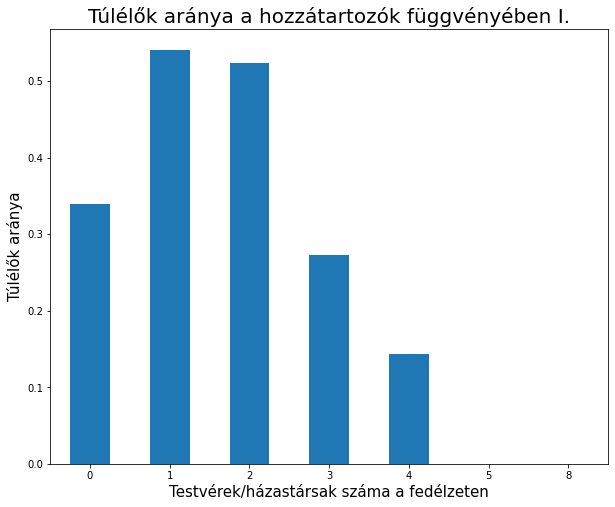

,Survived
SibSp,
0,0.338824
1,0.541096
2,0.523810
3,0.272727
4,0.142857
5,0.000000
8,0.000000


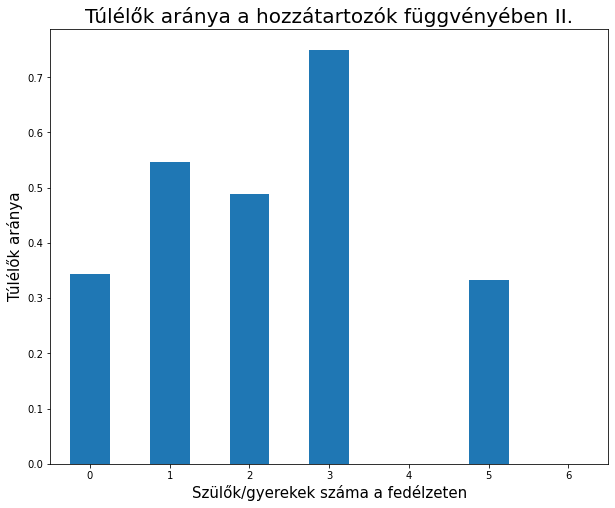

,Survived
Parch,
0,0.343035
1,0.546512
2,0.489362
3,0.750000
4,0.000000
5,0.333333
6,0.000000


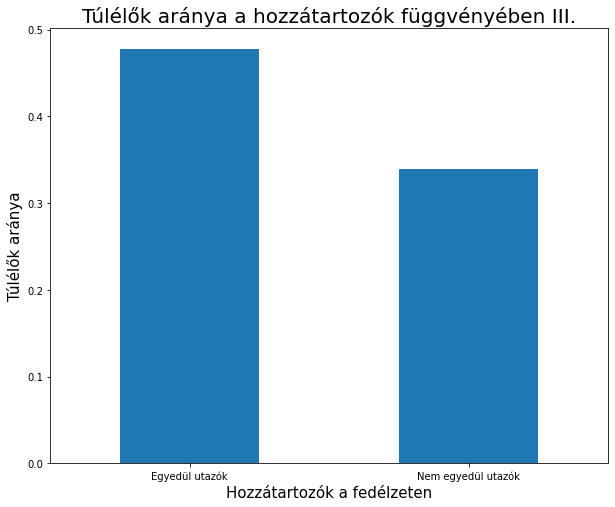

,Survived
IsAlone,
0,0.477387
1,0.338824


In [19]:
# Túlélők aránya a hozzátartozók függvényében - 3 változat

#1
dataset[['SibSp', 'Survived']].groupby(['SibSp'], as_index = True).mean().plot(kind = 'bar', figsize = (10, 8), legend = False)
plt.title('Túlélők aránya a hozzátartozók függvényében I.', fontsize = 20)
plt.xlabel('Testvérek/házastársak száma a fedélzeten', fontsize = 15)
plt.ylabel('Túlélők aránya', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

display(dataset[['SibSp', 'Survived']].groupby(['SibSp']).mean())

#2
dataset[['Parch', 'Survived']].groupby(['Parch'], as_index = True).mean().plot(kind = 'bar', figsize = (10, 8), legend = False)
plt.title('Túlélők aránya a hozzátartozók függvényében II.', fontsize = 20)
plt.xlabel('Szülők/gyerekek száma a fedélzeten', fontsize = 15)
plt.ylabel('Túlélők aránya', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

display(dataset[['Parch', 'Survived']].groupby(['Parch']).mean())

#3

dataset['IsAlone'] = isAlone

dataset[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = True).mean().plot(kind = 'bar', figsize = (10, 8), legend = False)
plt.title('Túlélők aránya a hozzátartozók függvényében III.', fontsize = 20)
plt.xlabel('Hozzátartozók a fedélzeten', fontsize = 15)
plt.ylabel('Túlélők aránya', fontsize = 15)
plt.xticks([0, 1], ['Egyedül utazók', 'Nem egyedül utazók'], rotation = 0)
plt.show()

display(dataset[['IsAlone', 'Survived']].groupby(['IsAlone']).mean())

dataset = dataset.drop(['IsAlone'], axis = 1)

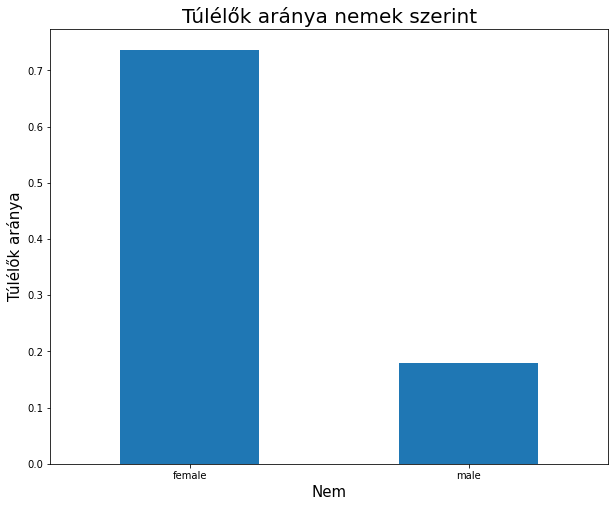

,Sex,Survived
0,female,0.736842
1,male,0.179293


In [20]:
# Túlélők aránya nemek szerint

dataset[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot(kind = 'bar', figsize = (10, 8), legend = False)
plt.title('Túlélők aránya nemek szerint', fontsize = 20)
plt.xlabel('Nem', fontsize = 15)
plt.ylabel('Túlélők aránya', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

display(dataset[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())

## Kategorikus adatok kezelése

In [21]:
import numpy as np

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_pred = dataset_pred.iloc[:, :].values

In [22]:
for x in (X, X_pred):
    for row in x:
        if row[1] == 'male':
            row[1] = 0
        else:
            row[1] = 1

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [6])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X_pred = np.array(ct.fit_transform(X_pred))

In [24]:
# for i in X:
#     print(i)

## A dataset szétválasztása Training set-re és Test set-re

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Klasszifikációs modellek betanítása és értékelése a Training set-en

### Modellek

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logisztikus regresszió': LogisticRegression(random_state = 0, max_iter = 2000),
    'KNN': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    'SVM': SVC(kernel = 'linear', random_state = 0),
    'Kernel SVM': SVC(kernel = 'rbf', random_state = 0),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state = 0),
    'Random Forest': RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
    'XGBoost': XGBClassifier(random_state = 0, eval_metric = ['logloss'])
}

### Betanítás és eredmények

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

data = []
for model in models.keys(): 
    
    print('\033[1m' + model + '\033[0m')
    print()
    
    # Betanítás
    classifier = models[model]
    if model == 'XGBoost':
        classifier.fit(X_train, y_train, eval_metric = ['logloss'])
    else:
        classifier.fit(X_train, y_train)
    
    # Az eredmények előrejelzése
    y_pred = classifier.predict(X_test)
    
    # Értékelés: Confusion Matrix és k-Fold Cross validáció
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Találati arány:', accuracy_score(y_test, y_pred))
    print()
    
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print('k-Fold:')
    print('Pontosság: {:.2f} %'.format(accuracies.mean() * 100))
    print('Szórás: {:.2f} %'.format(accuracies.std() * 100))
    print()
    data.append([model, accuracies.mean() * 100, accuracies.std() * 100])

Logisztikus regresszió

Confusion Matrix:
[[55 14]
 [18 38]]

Találati arány: 0.744

k-Fold:
Pontosság: 80.17 %
Szórás: 3.58 %

KNN

Confusion Matrix:
[[53 16]
 [32 24]]

Találati arány: 0.616

k-Fold:
Pontosság: 70.53 %
Szórás: 7.76 %

SVM

Confusion Matrix:
[[62  7]
 [16 40]]

Találati arány: 0.816

k-Fold:
Pontosság: 79.56 %
Szórás: 5.57 %

Kernel SVM

Confusion Matrix:
[[64  5]
 [44 12]]

Találati arány: 0.608

k-Fold:
Pontosság: 70.93 %
Szórás: 3.55 %

Naive Bayes

Confusion Matrix:
[[59 10]
 [27 29]]

Találati arány: 0.704

k-Fold:
Pontosság: 76.75 %
Szórás: 5.16 %

Decision Tree

Confusion Matrix:
[[56 13]
 [18 38]]

Találati arány: 0.752

k-Fold:
Pontosság: 76.54 %
Szórás: 3.59 %

Random Forest

Confusion Matrix:
[[58 11]
 [20 36]]

Találati arány: 0.752

k-Fold:
Pontosság: 77.55 %
Szórás: 2.20 %

XGBoost

Confusion Matrix:
[[59 10]
 [20 36]]

Találati arány: 0.76

k-Fold:
Pontosság: 78.74 %
Szórás: 5.15 %



In [28]:
results = pd.DataFrame(data, columns = ['Modell', 'Pontosság', 'Szórás']).set_index('Modell')
display(results)

,Pontosság,Szórás
Modell,,
Logisztikus regresszió,80.171429,3.582725
KNN,70.526531,7.762627
SVM,79.559184,5.569770
Kernel SVM,70.934694,3.553902
Naive Bayes,76.751020,5.163328
Decision Tree,76.538776,3.589136
Random Forest,77.551020,2.195068
XGBoost,78.742857,5.154273


A táblázat eredményei alapján, és mivel az egyszerűbb modell a preferált, a megoldások a logisztikus regressziós modell segítségével kerülnek elkészítésre.

## Megoldás

A dataset_pred (DA_titanic_test.csv) kiegészítése az elhalálozás valószínűségét megadó oszloppal

In [29]:
# A modell betanítása a DA_titanic_train.csv teljes tartalmán
classifier = LogisticRegression(random_state = 0, max_iter = 2000)
classifier.fit(X, y)

# Az eredmények, és azok valószínűségének előrejelzése a DA_titanic_test.csv tartalma alapján
y_pred = classifier.predict(X_pred)
y_pred_prob = classifier.predict_proba(X_pred)

In [30]:
NotSurvivedProb = [i[0] for i in y_pred_prob]
# NotSurvivedProb

In [31]:
final_test['NotSurvivedProb'] = NotSurvivedProb

In [32]:
display(final_test.head())
final_test.to_csv('result.csv', index_label = False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NotSurvivedProb
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.092730
1,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.869373
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.594802
3,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.960364
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.434561


In [33]:
final_result = pd.DataFrame(NotSurvivedProb, columns = ['NotSurvivedProb'])
final_result.head()
# final_result.to_csv('final_result.csv', index_label = False) 

,NotSurvivedProb
0,0.092730
1,0.869373
2,0.594802
3,0.960364
4,0.434561


## Megoldás - kiegészített

A megoldásban található dataset_pred kiegészítése a Survived oszlop prediktált értékével (0/1)

In [34]:
SurvivedPred = [i for i in y_pred]
# SurvivedPred

In [35]:
final_test['SurvivedPred'] = SurvivedPred

In [36]:
display(final_test.tail())
final_test.to_csv('result_2.csv', index_label = False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NotSurvivedProb,SurvivedPred
262,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0.053919,1
263,882,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,0.911597,0
264,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0.260751,1
265,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.779474,0
266,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.460238,1


In [37]:
final_result_2 = pd.DataFrame([NotSurvivedProb, SurvivedPred], index = ['NotSurvivedProb', 'SurvivedPred']).T
final_result_2.tail()
# final_result_2.to_csv('final_result_2.csv', index_label = False)

,NotSurvivedProb,SurvivedPred
262,0.053919,1.0
263,0.911597,0.0
264,0.260751,1.0
265,0.779474,0.0
266,0.460238,1.0
